## MINI PROJECT STUDY CASE MELLBOURNE
### KELOMPOK 5
1. Marisca Amanda Hidayat
2. Zahrah Aliyah Rachman
3. Muh. Asrul
4. Cynthia
5. Sakanti

In [1]:
# import libraries
import numpy as np
import pandas as pd

# import visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data from local files
df = pd.read_csv("data/Melbourne_housing.csv")

### DATA QUALITY ASSESSMENT

In [3]:
# show upper data
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# show bottom data
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [5]:
# check number of row and columns
df.shape

(34857, 21)

In [6]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
# check documentation
df.info?

Signature:
df.info(
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in
    ``pandas.options

In [8]:
# show missing
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [9]:
# show descriptive stats
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### DATA TYPE TRANSFORMATION

In [10]:
# Mengubah tipe data Date
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", format = "&d/%m/%y")

In [11]:
# Mengubah tipe data YearBuilt
df["YearBuilt"] = pd.to_numeric(df["YearBuilt"], errors='coerce').fillna(0).astype(int)

In [12]:
# Mengubah tipe data Postcode
df["Postcode"] = pd.to_numeric(df["Postcode"], errors='coerce').fillna(0).astype(int)

In [13]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           0 non-null      datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34857 non-null  int32         
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      3485

### HANDLING MISSING VALUE

In [14]:
# detect missing value precentage
missing_values = df.isnull().sum()
total_values = df.shape[0]

percentage_missing = round((missing_values / total_values) * 100, 2)

print(percentage_missing)

Suburb             0.00
Address            0.00
Rooms              0.00
Type               0.00
Price             21.83
Method             0.00
SellerG            0.00
Date             100.00
Distance           0.00
Postcode           0.00
Bedroom2          23.57
Bathroom          23.60
Car               25.04
Landsize          33.88
BuildingArea      60.58
YearBuilt          0.00
CouncilArea        0.01
Lattitude         22.88
Longtitude        22.88
Regionname         0.01
Propertycount      0.01
dtype: float64


In [15]:
# copy dataset
df1 = df.copy()

In [16]:
# check number of row and columns
df1.shape

(34857, 21)

In [17]:
# drop the missing value
df1 = df1.dropna(subset=["CouncilArea"])

In [18]:
# drop the missing value
df1 = df1.dropna(subset=["Regionname"])

In [19]:
# drop the missing value
df1 = df1.dropna(subset=["Propertycount"])

In [20]:
# handling missing values
numerical_cols = ['Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude']
for col in numerical_cols:
    df1[col].fillna(df1[col].median(), inplace=True)

In [21]:
# show the descriptive stats (price)
df1['Price'].describe()

count    3.485400e+04
mean     1.010863e+06
std      5.720167e+05
min      8.500000e+04
25%      6.950000e+05
50%      8.700000e+05
75%      1.150000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [22]:
# handling missing value (price)
df1['Price'].fillna(0, inplace = True)

In [23]:
# show the descriptive stats (bedroom2)
df1['Bedroom2'].describe()

count    34854.000000
mean         3.064698
std          0.858127
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         30.000000
Name: Bedroom2, dtype: float64

In [24]:
# handling missing value (bedroom2)
df1['Bedroom2'] = df1['Bedroom2'].fillna(df['Bedroom2'].median())

In [25]:
# show the descriptive stats (bathroom)
df1['Bathroom'].describe()

count    34854.000000
mean         1.713318
std          0.652777
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bathroom, dtype: float64

In [26]:
# handling missing values bathroom
region_medians_bathroom = df1.groupby("Regionname")["Bathroom"].median()
df1['Bathroom'] = df1.apply(
    lambda row: region_medians_bathroom[row['Regionname']] if pd.isnull(row['Bathroom']) else row['Bathroom'], axis=1
)

In [27]:
# show the descriptive stats (car)
df1['Car'].describe()

count    34854.000000
mean         1.796723
std          0.883005
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         26.000000
Name: Car, dtype: float64

In [28]:
# handling missing values car
df1 = df1.dropna(subset=['Car'])

In [29]:
# show the descriptive stats (landsize)
df1['Landsize'].describe()

count     34854.000000
mean        569.005652
std        2764.026645
min           0.000000
25%         357.000000
50%         521.000000
75%         598.000000
max      433014.000000
Name: Landsize, dtype: float64

In [30]:
# handling missing values Landsize
df1['Landsize'].fillna(0, inplace = True)

In [31]:
# show the descriptive stats (lattitude)
df1['Lattitude'].describe()

count    34854.000000
mean       -37.809940
std          0.079293
min        -38.190430
25%        -37.846900
50%        -37.807600
75%        -37.770893
max        -37.390200
Name: Lattitude, dtype: float64

In [32]:
# show the descriptive stats (longtitude)
df1['Longtitude'].describe()

count    34854.000000
mean       145.003212
std          0.105562
min        144.423790
25%        144.964400
50%        145.007800
75%        145.051750
max        145.526350
Name: Longtitude, dtype: float64

In [33]:
# handling missing values lattitude - longtitude
region_means_lattitude = df1.groupby("Regionname")["Lattitude"].mean()
region_means_longtitude = df1.groupby("Regionname")["Longtitude"].mean()

df1['Lattitude'] = df1.apply(
    lambda row: region_means_lattitude[row['Regionname']] if pd.isnull(row['Lattitude']) else row['Lattitude'],
    axis=1
)

df1['Longtitude'] = df1.apply(
    lambda row: region_means_longtitude[row['Regionname']] if pd.isnull(row['Longtitude']) else row['Longtitude'],
    axis=1
)

In [34]:
# show the descriptive stats (BuildingArea)
df1['BuildingArea'].describe()

count    13742.00000
mean       160.25640
std        401.26706
min          0.00000
25%        102.00000
50%        136.00000
75%        188.00000
max      44515.00000
Name: BuildingArea, dtype: float64

In [35]:
# handling missing value BuildingArea
df1['BuildingArea'] = df1['BuildingArea'].fillna(round(df1['BuildingArea'].mean(), 2))

In [36]:
# check missing values
df1.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date             34854
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt            0
CouncilArea          0
Lattitude            0
Longtitude           0
Regionname           0
Propertycount        0
dtype: int64

### DETECTING AND HANDLING OUTLIER

In [87]:
df1_num = df1.select_dtypes(include = ["int32", "int64", "float64"])

# detecting outlier using boxplot
for i in df1_num:
    plt.figure(figsize = (8,1))
    sns.boxplot(data = df1_num, x = i)
    plt.show()

In [39]:
# function to identify outliers using the IQR method
def find_outliers_iqr(column):
    if df1[column].dtype in ["int32","int64", "float64"]:

        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
        return outliers
    else:
        return pd.DataFrame

In [40]:
# Identify columns with outtiers
columns_with_outliers = []
outliers_counts = {}

for column in df1.columns:
    outliers = find_outliers_iqr(column)
    if not outliers.empty:
        columns_with_outliers.append(column)
        outliers_counts[column] = len(outliers)

In [41]:
# Fungsi untuk mencari dan menghapus outlier dari kolom DataFrame
def remove_outlier(df1, column):
    mean = df1[column].mean()
    std_dev = df1[column].std()
    
    z_scores = (df1[column] - mean) / std_dev
    threshold = 3  # Mengatur threshold untuk Z-score

    # Hanya menyimpan data dengan Z-score <= threshold
    df_cleaned = df1[(np.abs(z_scores) <= threshold)]

    return df_cleaned

# Daftar kolom yang akan diperiksa untuk outlier
columns_to_check = ['Price', 'Distance', 'Rooms', 'Bedroom2', 
                    'Bathroom', 'Landsize', 'BuildingArea', 'Propertycount']

# Menggunakan fungsi untuk mencari dan menghapus outlier dari setiap kolom
for column in columns_to_check:
    df1 = remove_outlier(df1, column)


In [42]:
df1.shape

(32115, 21)

### Descriptive Analysis

In [43]:
#computing mean for each column
df1.select_dtypes(['int64', 'float64']).mean()

Rooms                 2.967274
Price            964807.211615
Distance             10.787591
Bedroom2              3.011179
Bathroom              1.670030
Car                   1.764067
Landsize            502.249914
BuildingArea        153.805243
Lattitude           -37.808115
Longtitude          145.000001
Propertycount      7171.950615
dtype: float64

In [44]:
#computing median for each column
df1.select_dtypes(['int64', 'float64']).median()

Rooms                 3.0000
Price            870000.0000
Distance             10.1000
Bedroom2              3.0000
Bathroom              2.0000
Car                   2.0000
Landsize            521.0000
BuildingArea        160.2600
Lattitude           -37.8076
Longtitude          145.0078
Propertycount      6543.0000
dtype: float64

In [45]:
##computing mode for each column
df1.select_dtypes(['int64', 'float64']).mode()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount
0,3,870000.0,11.2,3.0,2.0,2.0,521.0,160.26,-37.8076,145.0078,8870.0


In [46]:
#computing range for each feature
for i in df:
    try:
        print(f'{i} range {df1[i].max()-df1[i].min()}')
    except:
        pass

Rooms range 4
Price range 2640000.0
Date range NaT
Distance range 31.7
Postcode range 802
Bedroom2 range 4.0
Bathroom range 3.0
Car range 18.0
Landsize range 8223.0
BuildingArea range 380.0
YearBuilt range 2106
Lattitude range 0.549199999999999
Longtitude range 0.8516799999999876
Propertycount range 17375.0


In [47]:
#computing std for each feature
df1.select_dtypes (['int64', 'float64']).std()

Rooms                 0.902768
Price            429326.893782
Distance              6.017710
Bedroom2              0.773965
Bathroom              0.577772
Car                   0.843029
Landsize            405.505807
BuildingArea         41.332166
Lattitude             0.071846
Longtitude            0.103837
Propertycount      3839.273392
dtype: float64

In [48]:
##computing var for each feature
df1.select_dtypes (['int64', 'float64']).var().round(2)

Rooms            8.100000e-01
Price            1.843216e+11
Distance         3.621000e+01
Bedroom2         6.000000e-01
Bathroom         3.300000e-01
Car              7.100000e-01
Landsize         1.644350e+05
BuildingArea     1.708350e+03
Lattitude        1.000000e-02
Longtitude       1.000000e-02
Propertycount    1.474002e+07
dtype: float64

In [49]:
for column in df1.columns:
    print(f"Value counts for {column}:")
    print(df1[column].value_counts().head(5))
    print('\n')

Value counts for Suburb:
Suburb
Bentleigh East    569
Richmond          543
Preston           475
Glen Iris         447
Brunswick         441
Name: count, dtype: int64


Value counts for Address:
Address
5 Charles St      6
25 William St     4
14 Rose St        3
23 Cromwell St    3
14 Arthur St      3
Name: count, dtype: int64


Value counts for Rooms:
Rooms
3    14182
2     7971
4     7204
1     1450
5     1308
Name: count, dtype: int64


Value counts for Type:
Type
h    21654
u     7035
t     3426
Name: count, dtype: int64


Value counts for Price:
Price
870000.0     7190
1100000.0     226
600000.0      220
1300000.0     206
800000.0      203
Name: count, dtype: int64


Value counts for Method:
Method
S     18241
SP     4748
PI     4410
VB     2821
SN     1229
Name: count, dtype: int64


Value counts for SellerG:
SellerG
Jellis           3155
Nelson           3004
Barry            2905
hockingstuart    2439
Buxton           1786
Name: count, dtype: int64


Value counts for Date:
Ser

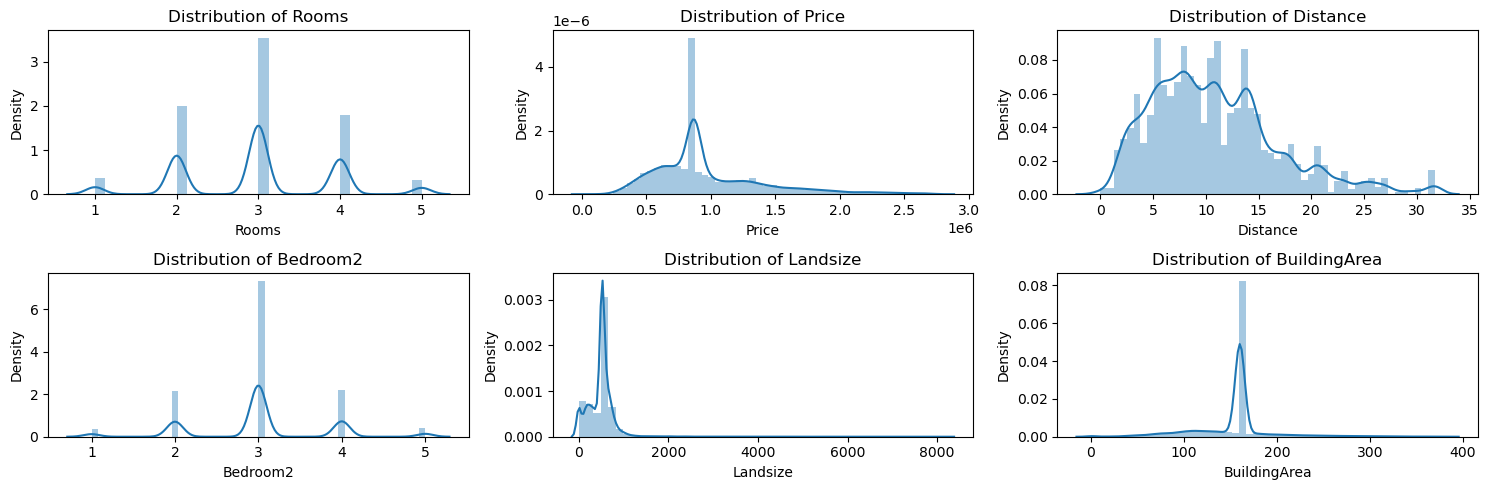

In [50]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 5))

# Plot distribusi untuk kolom "Rooms"
plt.subplot(2, 3, 1)
sns.distplot(df1["Rooms"])
plt.title("Distribution of Rooms")

# Plot distribusi untuk kolom "Price"
plt.subplot(2, 3, 2)
sns.distplot(df1["Price"])
plt.title("Distribution of Price")

# Plot distribusi untuk kolom "Distance"
plt.subplot(2, 3, 3)
sns.distplot(df1["Distance"])
plt.title("Distribution of Distance")

# Plot distribusi untuk kolom "Bedroom2"
plt.subplot(2, 3, 4)
sns.distplot(df1["Bedroom2"])
plt.title("Distribution of Bedroom2")

# Plot distribusi untuk kolom "Landsize"
plt.subplot(2, 3, 5)
sns.distplot(df1["Landsize"])
plt.title("Distribution of Landsize")

# Plot distribusi untuk kolom "BuildingArea"
plt.subplot(2, 3, 6)
sns.distplot(df1["BuildingArea"])
plt.title("Distribution of BuildingArea")

# Menampilkan plot
plt.tight_layout()
plt.show()

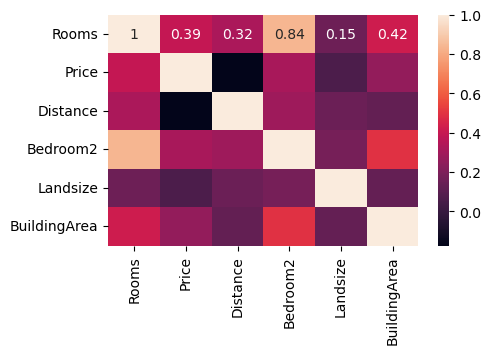

In [51]:
#visualizing with corelation metrix
plt.figure(figsize=(5, 3))
sns.heatmap(df1[['Rooms', 'Price', 'Distance', 'Bedroom2', 'Landsize', 'BuildingArea']].corr(), annot=True)
plt.show()

### SUMMARY

In [88]:
df1 = pd.read_csv("data/Melbourne_housing.csv")

No 1 Trend of Housing Prices Over Years

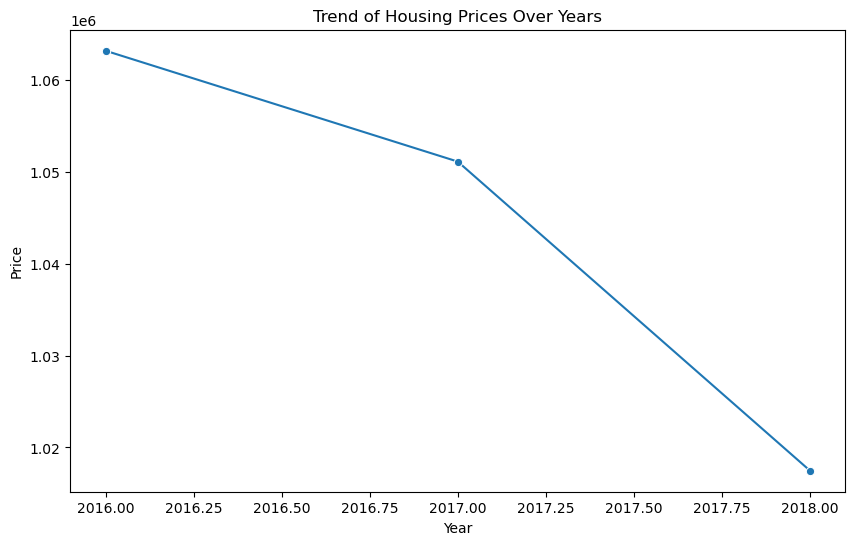

In [89]:
# Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)

# Extract the year from the 'Date' column
df1['Year'] = df1['Date'].dt.year

# Calculate the average price per year
avg_price_year = df1.groupby('Year')['Price'].mean().reset_index()

# Visualize using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price', data=avg_price_year, marker='o', color=blue_color)
plt.title('Trend of Housing Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

No 2 top 10 suburbs by average price per square meter

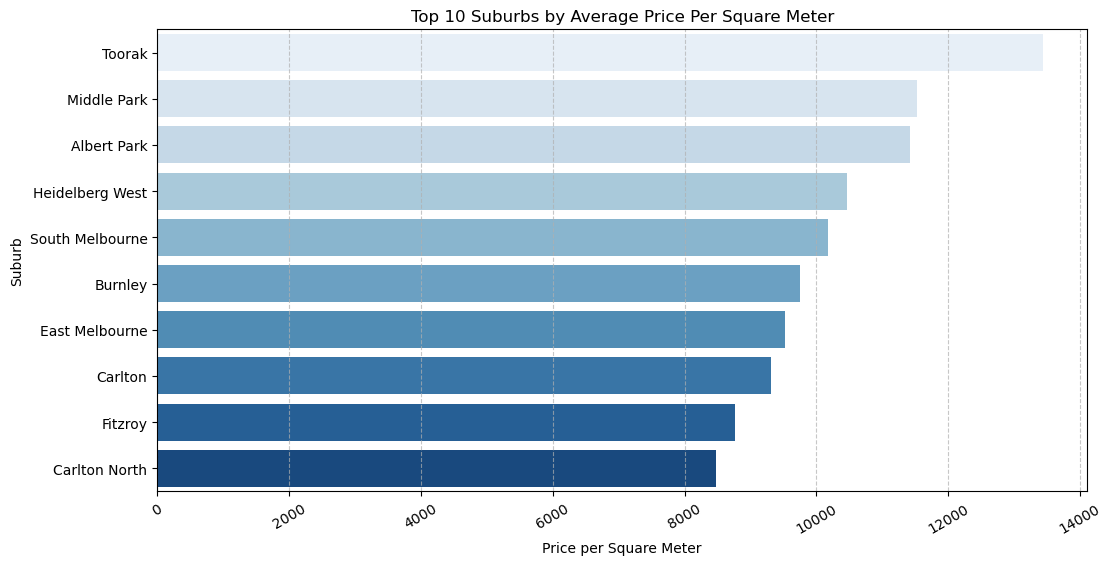

In [90]:
# Filter data to get Landsize greater than 0
df_filtered = df1[df1['Landsize'] > 0].copy() 

# Calculate price per square meter
df_filtered['price_per_sqm'] = df_filtered['Price'] / df_filtered['Landsize']

# Calculate the average price per square meter for each suburb
top_10_avg_price_per_sqm = df_filtered.groupby('Suburb')['price_per_sqm'].mean().reset_index()

# Sort the data by price per square meter in descending order and select the top 10
top_10_avg_price_per_sqm = top_10_avg_price_per_sqm.sort_values(by='price_per_sqm', ascending=False).head(10)

# Visualize using a bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(y='Suburb', x='price_per_sqm', data=top_10_avg_price_per_sqm, palette='Blues')
plt.title('Top 10 Suburbs by Average Price Per Square Meter')
plt.xlabel('Price per Square Meter')
plt.ylabel('Suburb')
plt.xticks(rotation=30)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

No 3 top 5 avarage price by suburb 

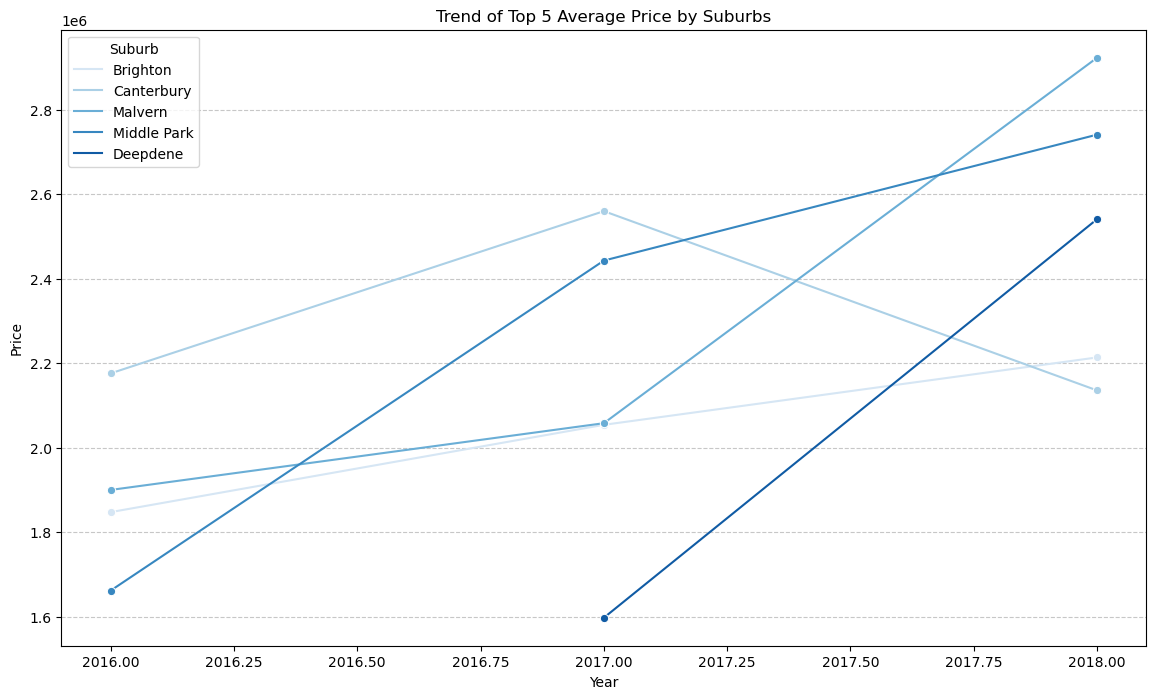

In [91]:
# Calculate the average price for each suburb 
avg_price_suburb_year = df1.groupby(['Year', 'Suburb'])['Price'].mean().reset_index()

# Filter to select only the top 5 suburbs by average price overall 
top_suburbs = avg_price_suburb_year.groupby('Suburb')['Price'].mean().nlargest(5).index
top_5_avg_price_suburb_year = avg_price_suburb_year[avg_price_suburb_year['Suburb'].isin(top_suburbs)]

# Visualize using a line plot 
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Price', hue='Suburb', data=top_5_avg_price_suburb_year, marker='o', palette='Blues')
plt.title('Trend of Top 5 Average Price by Suburbs')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Suburb')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No 4 top 5 value for money suburbs based on price per land area

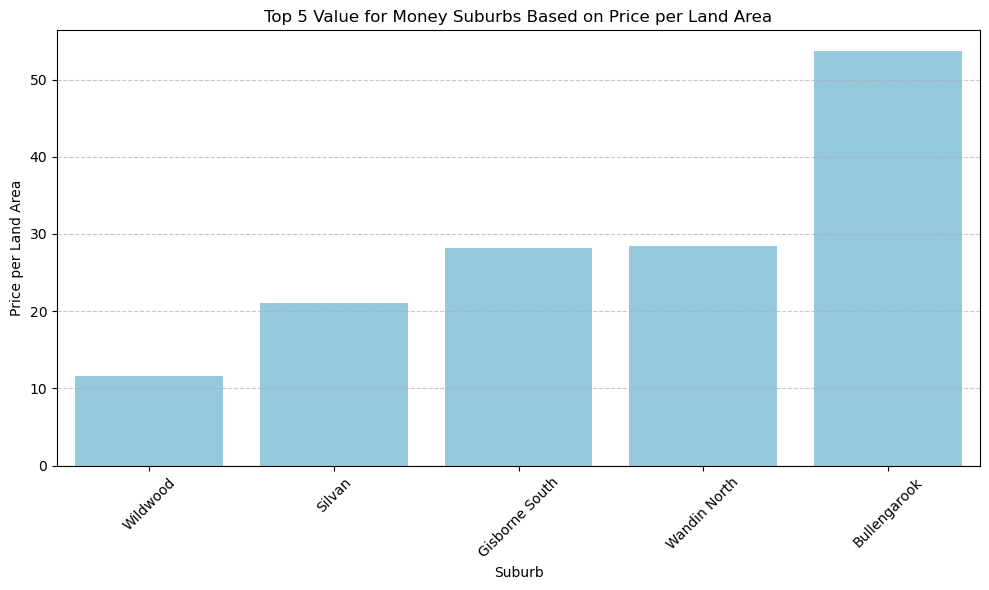

In [92]:
# Create a column for price per land size
df1['price_per_land_size'] = df1['Price'] / df1['Landsize']

# Calculate the average price per land size based on suburb
avg_price_per_land_size = df1.groupby('Suburb')['price_per_land_size'].mean().reset_index()

# Get the 5 suburbs with the lowest average price per land size
value_for_money_suburbs = avg_price_per_land_size.nsmallest(5, 'price_per_land_size')

# Visualize using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Suburb', y='price_per_land_size', data=value_for_money_suburbs, color='skyblue')
plt.title('Top 5 Value for Money Suburbs Based on Price per Land Area')
plt.xlabel('Suburb')
plt.ylabel('Price per Land Area')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

No 5 average price 2 bedroom unit by region

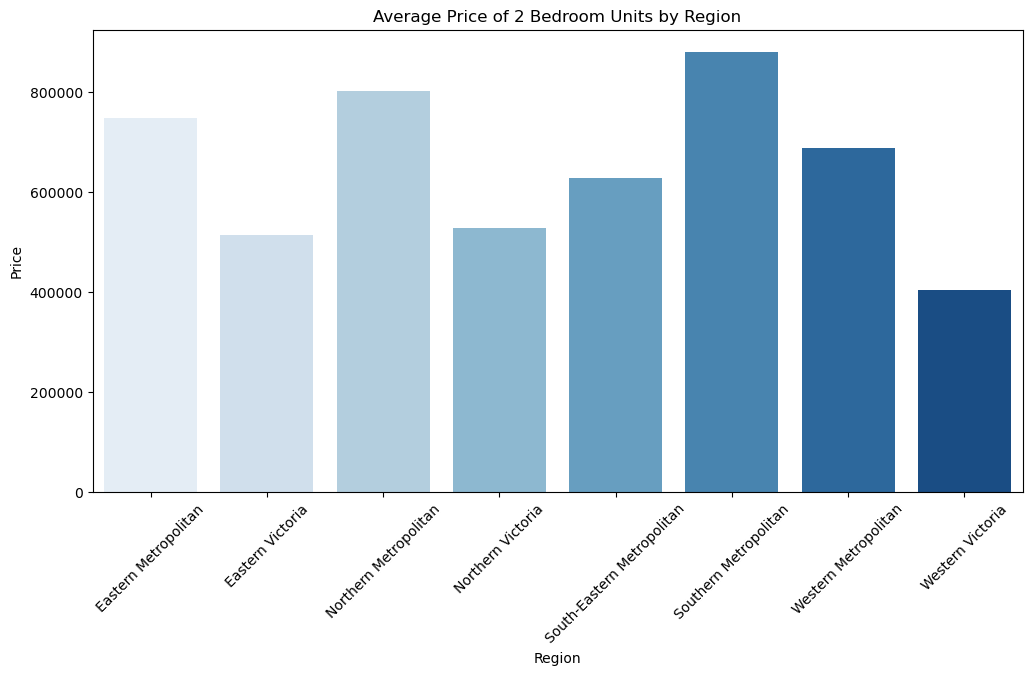

In [93]:
# Filter data for only 2 bedroom units
df_2_bedroom2 = df1[df1['Bedroom2'] == 2]

# Calculate the average price by region
avg_price_by_region = df_2_bedroom2.groupby('Regionname')['Price'].mean().reset_index()

# Visualize using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Regionname', y='Price', data=avg_price_by_region, palette='Blues')
plt.title('Average Price of 2 Bedroom Units by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

#### Export the cleaned data to a new CSV file

In [ ]:
df1.to_csv('data/Melbourne_housing_cleaned.csv', index=False)
print("Data has been successfully saved") 